# Import Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [2]:
my_movies = pd.read_csv("my_movies.csv")

In [3]:
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [12]:
data = my_movies.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


#We can do preprocessing if we have catagorical values

# Apriori Algorithm

In [16]:
frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [17]:
#finding the rules for different support values
frequent_itemsets = apriori(data, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,"(Gladiator, Patriot)"


In [18]:
frequent_itemsets = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [19]:
frequent_itemsets = apriori(data, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [20]:
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


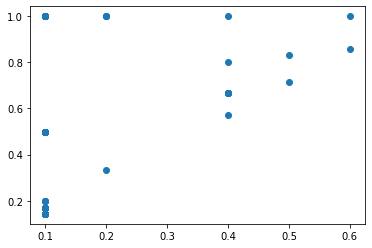

In [22]:
import matplotlib.pyplot as plt
plt.scatter(rules.support,rules.confidence)

In [23]:
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [24]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,(LOTR),"(Gladiator, Sixth Sense, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
214,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(Sixth Sense, Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
156,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
157,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
184,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
185,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
171,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
170,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [25]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Sixth Sense, LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
